#**1. Import Library**



In [1]:
# import required libraies/dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Dataset Description**

Theo Tổ chức Y tế Thế giới (WHO), đột quỵ là nguyên nhân gây tử vong đứng thứ 2 trên toàn cầu, chiếm khoảng 11% tổng số ca tử vong.
Tập dữ liệu này được sử dụng để dự đoán liệu một bệnh nhân có khả năng bị đột quỵ hay không dựa trên các thông số đầu vào như giới tính, tuổi tác, các bệnh khác nhau và tình trạng hút thuốc. Mỗi hàng trong dữ liệu cung cấp thông tin liên quan về bệnh nhân.

**Các đặc trưng trong tập dữ liệu**:<br>
1) id: Mã định danh của bệnh nhân<br>
2) gender: Giới tính của bệnh nhân, "Male", "Female" or "Other"<br>
3) age: Tuổi bệnh nhân<br>
4) hypertension: Chỉ số huyết áp, có giá trị là 0 nếu bệnh nhân không bị tăng huyết áp, 1 nếu bệnh nhân bị tăng huyết áp<br>
5) heart_disease: Chỉ số về tim, có giá trị là 0 nếu bệnh nhân không mắc bệnh tim, 1 nếu bệnh nhân mắc bệnh tim<br>
6) ever_married: Tình trạng kết hôn, "No" hoặc "Yes"<br>
7) work_type: Loại công việc mà bệnh nhân đang làm, "children", "Govt_jov", "Never_worked", "Private" hoặc "Self-employed"<br>
8) Residence_type: Khu vực cư trú, "Rural" hoặc "Urban", "Nông Thôn" hoặc "Thành Thị"<br>
9) avg_glucose_level: Chỉ số lượng đường trung bình trong máu<br>
10) bmi: Chỉ số BMI (Body Mass Index) được tính dựa trên tỉ lệ giữa cân nặng và chiều cao bình phương, nói lên tình trạng cân nặng hiện tại của bệnh nhân. So với giá trị BMI tiêu chuẩn, chỉ số BMI cá nhân sẽ xác định một người đang thừa cân, thiếu cân hay có cân nặng cân đối. <br>
11) smoking_status: Tình trạng hút thuốc "formerly smoked", "never smoked", "smokes" hoặc "Unknown"*<br>
12) stroke: Có giá trị là 1 nếu bệnh nhân bị đột quỵ, và 0 nếu bệnh nhân không đột quỵ<br>



**Mục tiêu của bài toán**: Xây dựng mô hình Machine Learning để dự đoán xác suất một người bị đột quỵ

# **3. Data Exploration**

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Data Mining/FinalProject/dataset/train.csv', index_col=0)
df_test = pd.read_csv('/content/drive/MyDrive/Data Mining/FinalProject/dataset/test.csv', index_col=0)

In [4]:
df_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [5]:
df_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [6]:
print(f'Bộ dữ liệu dùng để huấn luyện df_train bao gồm {df_train.shape[0]} dòng và {df_train.shape[1]} cột.')

Bộ dữ liệu dùng để huấn luyện df_train bao gồm 15304 dòng và 11 cột.


In [7]:
df_train.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
numeric_features = df_train.select_dtypes(exclude='object').columns
categorical_features = df_train.select_dtypes(include='object').columns

print("Các đặc trưng số:", numeric_features)
print("Các đặc trưng phân loại", categorical_features)

Các đặc trưng số: Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')
Các đặc trưng phân loại Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


Có **6** đặc trưng số và **5** đặc trưng phân loại.

In [9]:
df_train.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


# **4. Explanatory Data Analysis (EDA)**

# 4.1 Trực quan hóa từng đặc trưng trong bộ dữ liệu

**Gender**

In [10]:
# gender
df_train['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

Có **3** giá trị **gender** bao gồm *Male*, *Female* và *other*.

In [11]:
# gender count
pd.crosstab(
    index=df_train['gender'],
    columns='Counts'
).T

gender,Female,Male,Other
col_0,,,
Counts,9446,5857,1


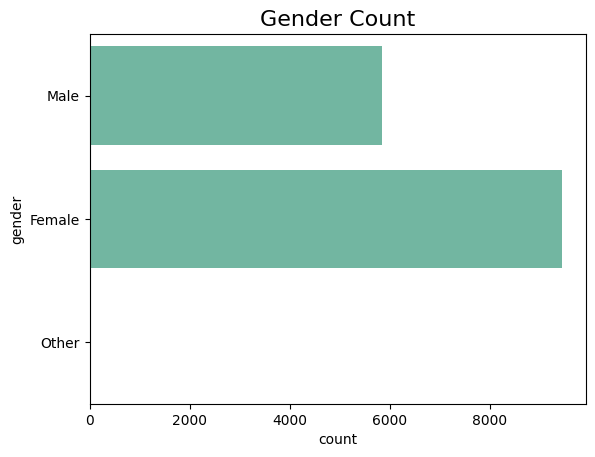

In [12]:
# gender count visualization
sns.set_palette('Set2')
ax = sns.countplot(df_train['gender'])
ax.set_title('Gender Count', fontdict={'fontsize': 16})
plt.show()

Qua biểu đồ trên cho thấy, trong tập dữ liệu thì giới tính nữ chiếm phần lớn, sau đó đến Nam và giới tính khác chỉ có 1 giá trị.

**Age**

In [13]:
# age
df_train['age'].describe()

count    15304.000000
mean        41.417708
std         21.444673
min          0.080000
25%         26.000000
50%         43.000000
75%         57.000000
max         82.000000
Name: age, dtype: float64

Số tuổi nhỏ nhất trong tập dữ liệu là **0.08** tuổi, và lớn nhất là **82** tuổi.

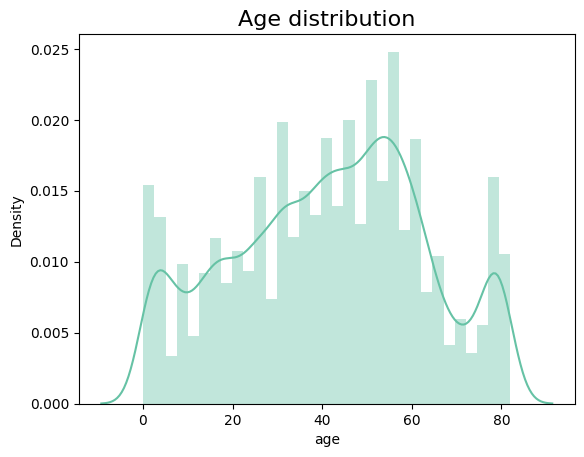

In [14]:
# Age distribution visualization

ax = sns.distplot(df_train['age'])
ax.set_title('Age distribution', fontdict={'fontsize': 16})
plt.show()

Độ tuổi trong tập dữ liệu phân phối chủ yếu từ 40 đến 60 tuổi

**hypertension**

In [15]:
df_train['hypertension'].unique()

array([0, 1])

Chỉ có 2 giá trị cho thuộc tính *hypertension(tăng huyết áp)* đó là *0* và *1*, *0* cho đối tượng không tăng huyết áp và *1* cho đối tượng bị tăng huyết áp.

In [16]:
# hypertension count
pd.crosstab(
    index=df_train['hypertension'],
    columns='Counts'
).T

hypertension,0,1
col_0,,
Counts,14543,761


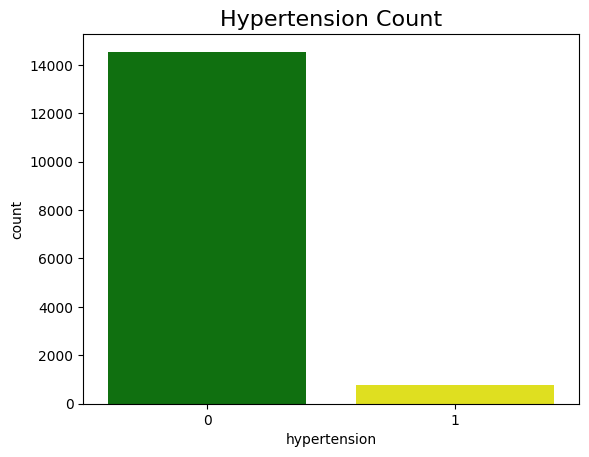

In [17]:
# hypertension count visualization

ax = sns.countplot(x = 'hypertension', data = df_train, palette=['green', 'yellow'])
ax.set_title('Hypertension Count', fontdict={'fontsize': 16})
plt.show()

Số lượng dữ liệu không bị tăng huyết áp (14543) cao hơn nhiều so với lượng dữ liệu bị tăng huyết áp (761).

**heart_disease**

In [18]:
df_train['heart_disease'].unique()

array([0, 1])

In [19]:
# heart_disease count
pd.crosstab(
    index=df_train['heart_disease'],
    columns='Counts'
).T

heart_disease,0,1
col_0,,
Counts,14947,357


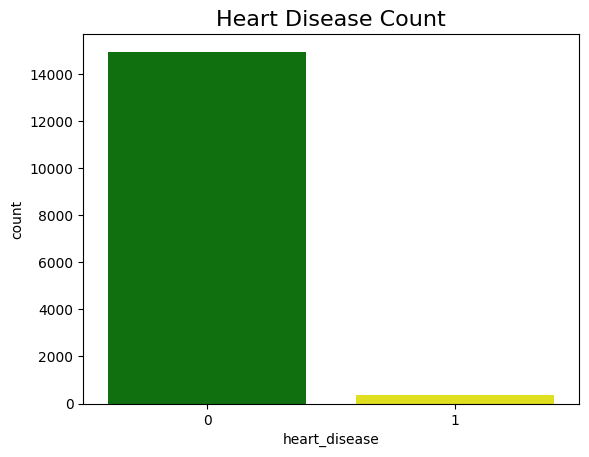

In [20]:
# heart disease count visualization

ax = sns.countplot(x = 'heart_disease', data = df_train, palette=['green', 'yellow'])
ax.set_title('Heart Disease Count', fontdict={'fontsize': 16})
plt.show()

**ever_married**

In [21]:
df_train['ever_married'].unique()

array(['Yes', 'No'], dtype=object)



Có 2 giá trị của thuộc tính ever_married là Yes và No. Yes là đã từng kết hôn và No là ngược lại

In [22]:
# ever_married count
pd.crosstab(
    index=df_train['ever_married'],
    columns='Counts'
).T


ever_married,No,Yes
col_0,,
Counts,4919,10385


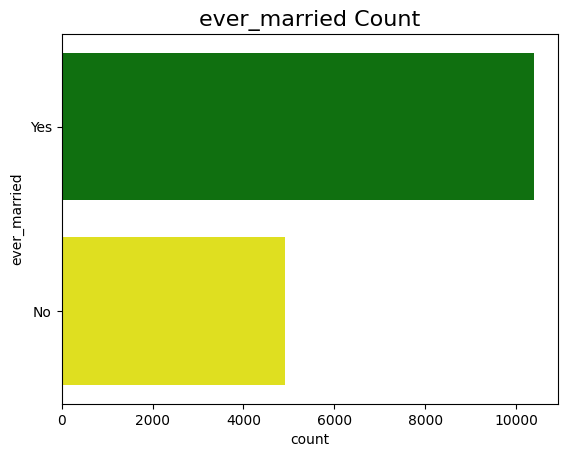

In [23]:
# ever_married count visualization

ax = sns.countplot(df_train['ever_married'], palette = ['green', 'yellow'])
ax.set_title('ever_married Count', fontdict={'fontsize': 16})
plt.show()

**work_type**

In [24]:
df_train['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [25]:
# work_type count
pd.crosstab(
    index=df_train['work_type'],
    columns='Counts'
).T

work_type,Govt_job,Never_worked,Private,Self-employed,children
col_0,,,,,
Counts,1533,42,9752,1939,2038


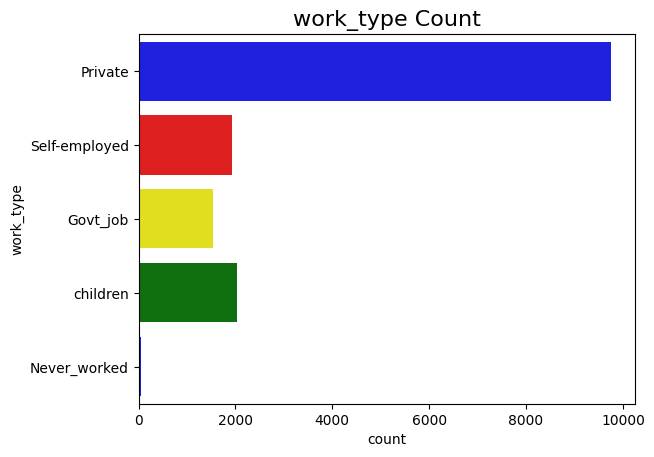

In [26]:
# work_type count visualization

sns.set_palette('Set2')
ax = sns.countplot(df_train['work_type'], palette=['blue', 'red', 'yellow', 'green'])
ax.set_title('work_type Count', fontdict={'fontsize': 16})
plt.show()

**Residence_type**

In [27]:
df_train['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

Có 2 giá trị trong thuộc tính *Residence_type*, *Urban* và *Rural*

In [28]:
# Residence_type count
pd.crosstab(
    index=df_train['Residence_type'],
    columns='Counts'
).T

Residence_type,Rural,Urban
col_0,,
Counts,7664,7640


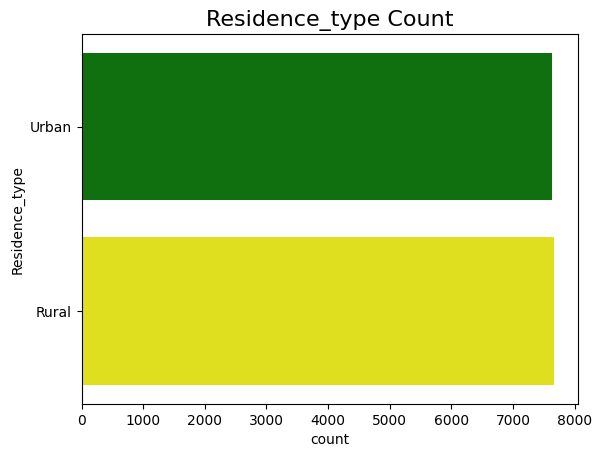

In [29]:
# Residence_type count visualization

ax = sns.countplot(df_train['Residence_type'], palette = ['green', 'yellow'])
ax.set_title('Residence_type Count', fontdict={'fontsize': 16})
plt.show()

**avg_glucose_level**

In [30]:
# avg_glucose_level
df_train['avg_glucose_level'].describe()

count    15304.000000
mean        89.039853
std         25.476102
min         55.220000
25%         74.900000
50%         85.120000
75%         96.980000
max        267.600000
Name: avg_glucose_level, dtype: float64

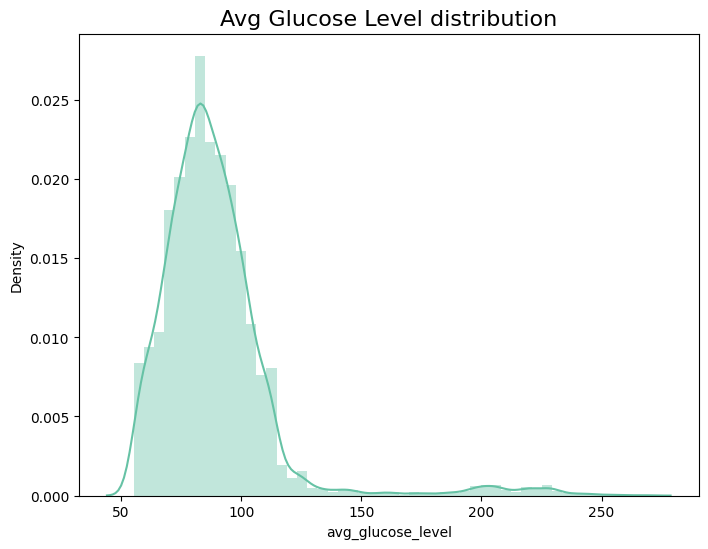

In [31]:
# avg_glucose_level distribution visualization
plt.figure(figsize=(8, 6))

ax = sns.distplot(df_train['avg_glucose_level'])
ax.set_title('Avg Glucose Level distribution', fontdict={'fontsize': 16})
plt.show()

*avg_glucose_level* không được phân bổ đồng đều; phần lớn các điểm dữ liệu có *avg_glucose_level* trung bình là 60-120, nhưng rất ít trong số đó có mức 120-250.

**bmi**

In [32]:
# bmi
df_train['bmi'].describe()

count    15304.000000
mean        28.112721
std          6.722315
min         10.300000
25%         23.500000
50%         27.600000
75%         32.000000
max         80.100000
Name: bmi, dtype: float64

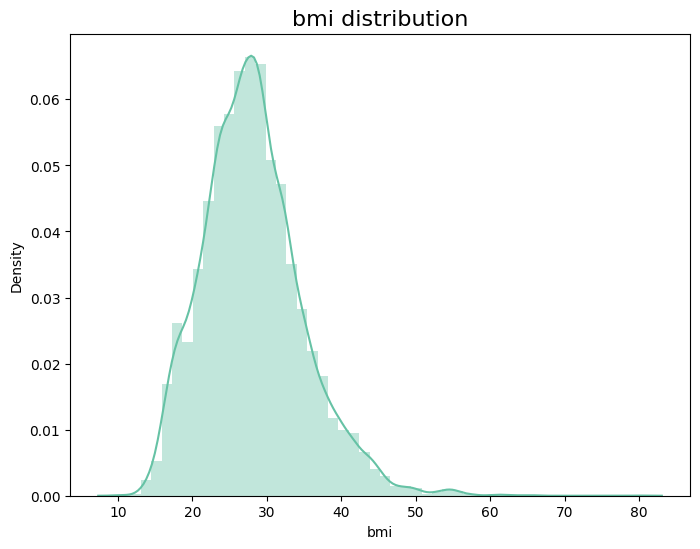

In [33]:
# bmi distribution visualization
plt.figure(figsize=(8, 6))

ax = sns.distplot(df_train['bmi'])
ax.set_title('bmi distribution', fontdict={'fontsize': 16})
plt.show()

Biểu đồ trực quan hóa thuộc tính *bmi* không được phân bổ đồng đều; phần lớn các quan sát có *bmi* là 25-35, phần ít trong số đó có chỉ số 50-80.

**smoking_status**

In [34]:
df_train['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

Có 4 giá trị thuộc đặc trưng *smoking_status* đó là 'never smoked', 'formerly smoked', 'Unknown' and 'smokes'.

In [35]:
# smoking_status count
pd.crosstab(
    index=df_train['smoking_status'],
    columns='Counts'
).T

smoking_status,Unknown,formerly smoked,never smoked,smokes
col_0,,,,
Counts,4543,2337,6281,2143


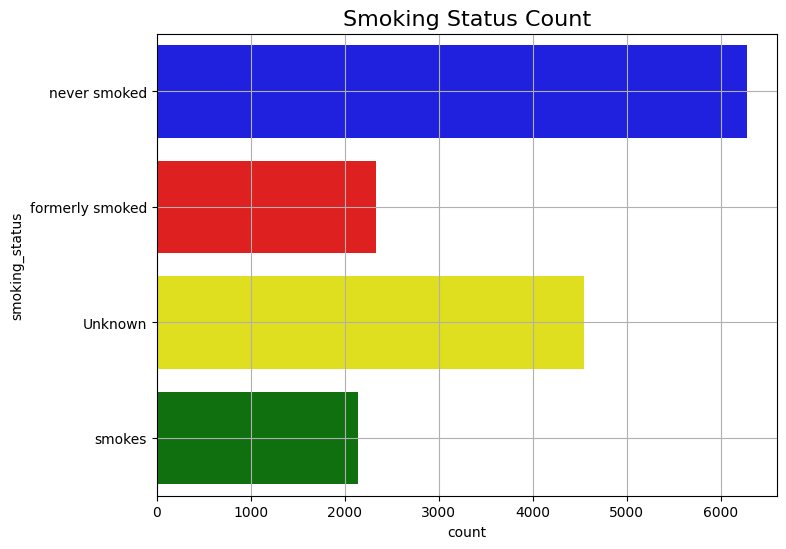

In [36]:
# smoking_status count visualization
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')
ax = sns.countplot(df_train['smoking_status'], palette=['blue', 'red', 'yellow', 'green'])
ax.set_title('Smoking Status Count', fontdict={'fontsize': 16})
plt.grid(True)
plt.show()

**stroke** - target variable

In [37]:
df_train['stroke'].unique()

array([0, 1])

1 cho đối tượng bị đột quy, 0 cho đối tượng không bị đột quỵ

In [38]:
# target variable count
pd.crosstab(
    index=df_train['stroke'],
    columns='Counts'
).T

stroke,0,1
col_0,,
Counts,14672,632


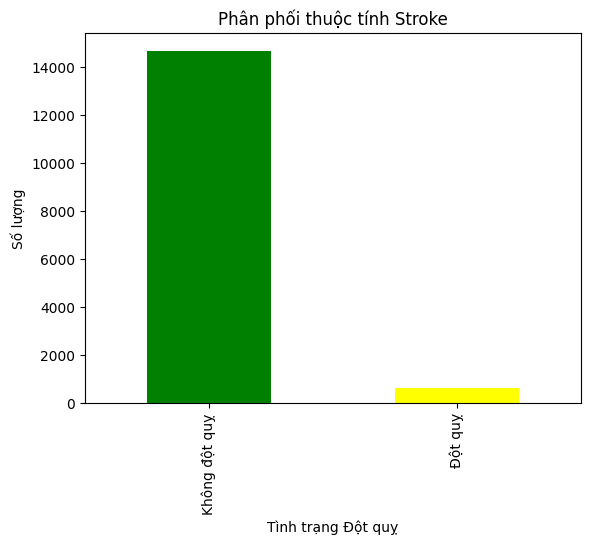

In [39]:
counts = df_train['stroke'].value_counts()

# Tạo biểu đồ cột
counts.plot(kind='bar', color=['green', 'yellow'])
plt.title('Phân phối thuộc tính Stroke')
plt.xlabel('Tình trạng Đột quỵ')
plt.ylabel('Số lượng')
plt.xticks(ticks=[0, 1], labels=['Không đột quỵ', 'Đột quỵ'])

# Hiển thị biểu đồ
plt.show()

Biến mục tiêu thể hiện (target variable) **độ lệch** cực cao có thể ảnh hưởng tiêu cực đến mô hình Machine Learning. Giá trị **1 (632)** thấp hơn nhiều so với giá trị **0 (14672).**

# 4.2  Trực quan hóa mối quan hệ của các đặc trưng đối với biến mục tiêu

**Trước tiên, ta sẽ kiểm tra tác động của các thuộc tính phân loại đối với biến mục tiêu, sau đó ta sẽ xem xét các thuộc tính số.**

**1- Gender**

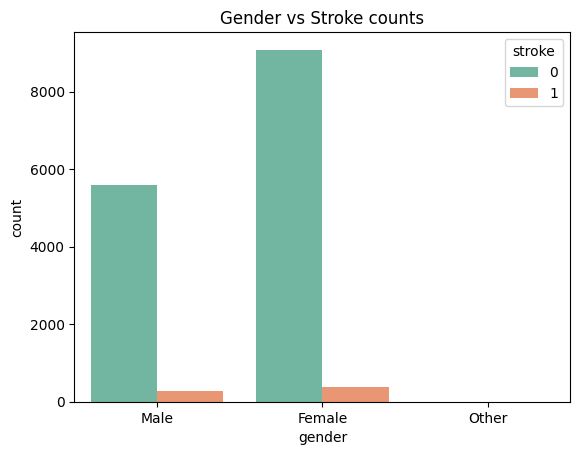

In [40]:
# How gender effects the target variable

sns.set_palette('Set2')

ax = sns.countplot(x = 'gender', hue='stroke', data = df_train)
ax.set_title('Gender vs Stroke counts')
plt.show()

In [41]:
# gender vs stroke
pd.crosstab(
    index=df_train['gender'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
gender,,
Female,0.961042,0.038958
Male,0.954926,0.045074
Other,1.000000,0.000000
All,0.958704,0.041296


Như chúng ta có thể thấy từ bảng và biểu đồ bên trên, nếu xét về giới tính. **tỉ lệ 96% nữ và 95% nam không mắc bệnh đột quỵ, một tỷ lệ gần như là ngang nhau.**

**2- Ever Married**

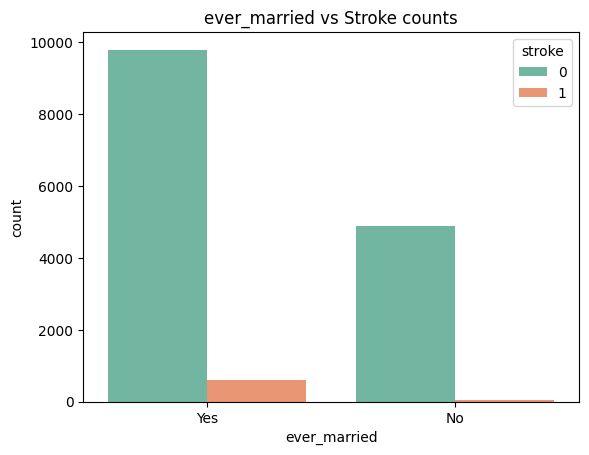

In [42]:
# How ever_married feature effects the target variable

sns.set_palette('Set2')

ax = sns.countplot(x = 'ever_married', hue='stroke', data = df_train)
ax.set_title('ever_married vs Stroke counts')
plt.show()

In [43]:
# Ever Married vs stroke
pd.crosstab(
    index=df_train['ever_married'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
ever_married,,
No,0.991665,0.008335
Yes,0.943091,0.056909
All,0.958704,0.041296


Những người đã từng kết hôn có nguy cơ bị đột quỵ cao hơn những người chưa từng kết hôn;

**3- Work Type**

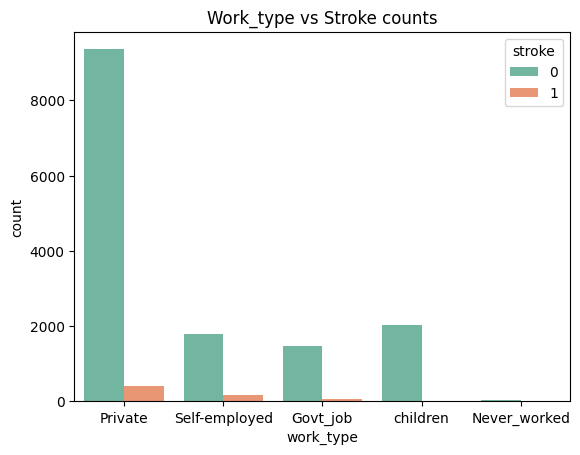

In [44]:
# How work_type feature effects the target variable

sns.set_palette('Set2')

ax = sns.countplot(x = 'work_type', hue='stroke', data = df_train)
ax.set_title('Work_type vs Stroke counts')
plt.show()

In [45]:
# Work Type vs stroke
pd.crosstab(
    index=df_train['work_type'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
work_type,,
Govt_job,0.954990,0.045010
Never_worked,1.000000,0.000000
Private,0.958573,0.041427
Self-employed,0.918515,0.081485
children,0.999509,0.000491
All,0.958704,0.041296


Những người chưa bao giờ làm việc có nguy cơ bị đột quỵ thấp nhất, trong khi đó những người tự kinh doanh có nguy cơ bị đột quỵ cao nhất.

**4- Residence_type**

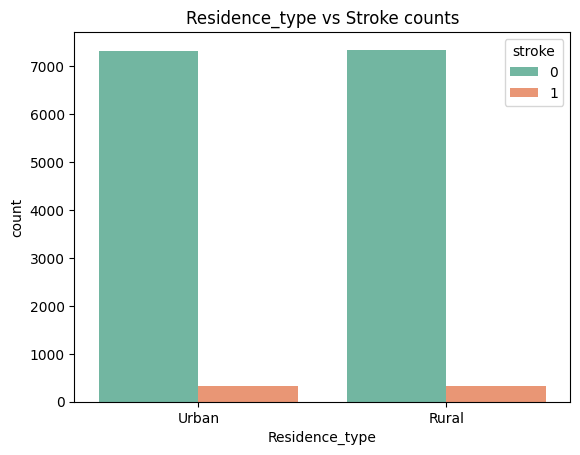

In [46]:
# How Residence_type feature effects the target variable

sns.set_palette('Set2')

ax = sns.countplot(x = 'Residence_type', hue= 'stroke', data = df_train)
ax.set_title('Residence_type vs Stroke counts')
plt.show()

In [47]:
# Residence_type vs stroke
pd.crosstab(
    index=df_train['Residence_type'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
Residence_type,,
Rural,0.958638,0.041362
Urban,0.958770,0.041230
All,0.958704,0.041296


Tỷ lệ bị đột quỵ gần như là bằng nhau dù bệnh nhân ở nông thôn hay thành thị. Có thể xem xét loại bỏ thuộc tính này, vì tác động của các giá trị của thuộc tính đối với biến mục tiêu là như nhau.


**5- Smoking Status**

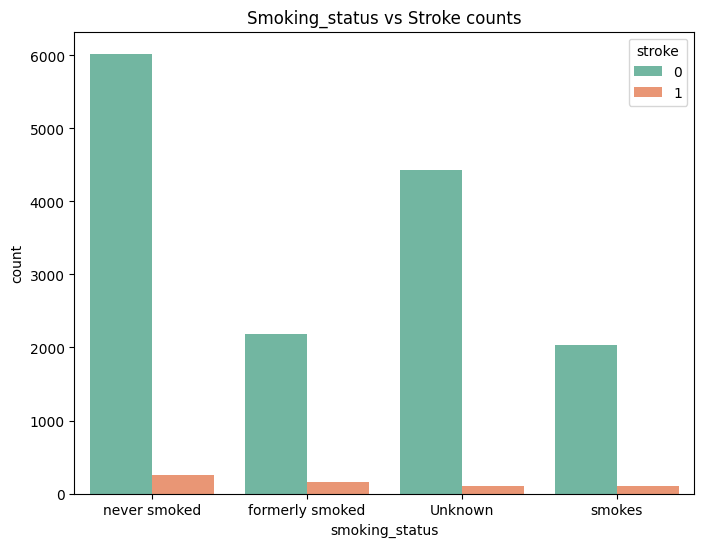

In [48]:
# How smoking_status feature effects the target variable
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')

ax = sns.countplot(x = 'smoking_status', hue = 'stroke', data = df_train)
ax.set_title('Smoking_status vs Stroke counts')
plt.show()

In [49]:
# smoking_status vs stroke
pd.crosstab(
    index=df_train['smoking_status'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
smoking_status,,
Unknown,0.976227,0.023773
formerly smoked,0.931964,0.068036
never smoked,0.959083,0.040917
smokes,0.949603,0.050397
All,0.958704,0.041296


*Unknown* & *never smoked* có ít khả năng bị đột quỵ hơn, trong khi đó *formerly smoked* và *smokes* có khả năng cao hơn sẽ bị đột quỵ. Tóm lại, những người đã và đang hút thuốc có nguy cơ đột quỵ cao hơn những người chưa từng hút thuốc.

**6- Hypertension**

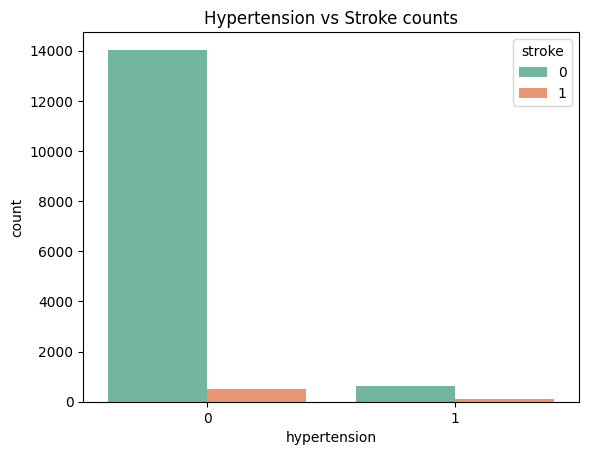

In [50]:
# How hypertension feature effects the target variable

sns.set_palette('Set2')
ax = sns.countplot(x = 'hypertension', hue='stroke', data = df_train)
ax.set_title('Hypertension vs Stroke counts')
plt.show()

In [51]:
# Hypertension vs stroke
pd.crosstab(
    index=df_train['hypertension'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
hypertension,,
0,0.965344,0.034656
1,0.831800,0.168200
All,0.958704,0.041296


Những người đang bị *tăng huyết áp(hypertension)* có nguy cơ bị đột quỵ cao hơn đáng kể so với những người không bị *tăng huyết áp(hypertension)*.

**7- Heart Disease**

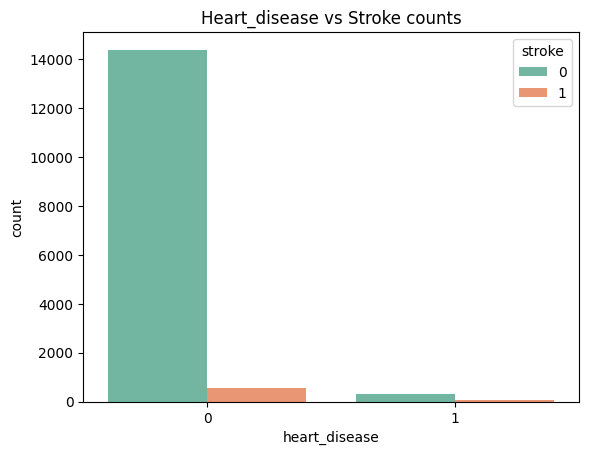

In [52]:
# How heart_disease feature effects the target variable
sns.set_palette('Set2')
ax = sns.countplot( x = 'heart_disease', hue='stroke', data = df_train)
ax.set_title('Heart_disease vs Stroke counts')
plt.show()

In [53]:
# heart_disease vs stroke
pd.crosstab(
    index=df_train['heart_disease'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
heart_disease,,
0,0.962133,0.037867
1,0.815126,0.184874
All,0.958704,0.041296


Những người đang mắc *bệnh tim(heart_disease)* có nguy cơ bị đột quỵ cao đáng kể hơn những người không mắc *bệnh tim(heart_disease)*.\

---

**Tác động của các đặc trưng dạng số đối với biến mục tiêu**

**1- Age**

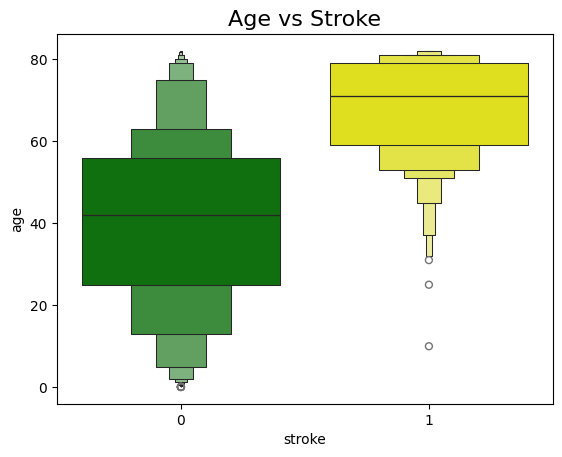

In [54]:
# How age feature effects the target variable

ax = sns.boxenplot(data=df_train, x='stroke', y='age', palette = ['green', 'yellow'])
ax.set_title('Age vs Stroke', fontdict={'fontsize': 16})
plt.show()

Chúng ta có thể thấy rõ rằng hầu hết các điểm dữ liệu bị đột quỵ đều có số tuổi trên 60 trong khi hầu hết các điểm dữ liệu không bị đột quỵ đều dưới 60. Vậy người lớn tuổi (trên 60) có nguy cơ mắc bệnh đột quỵ cao hơn so với người dưới 60 tuổi

**2- Ave Glucose level**

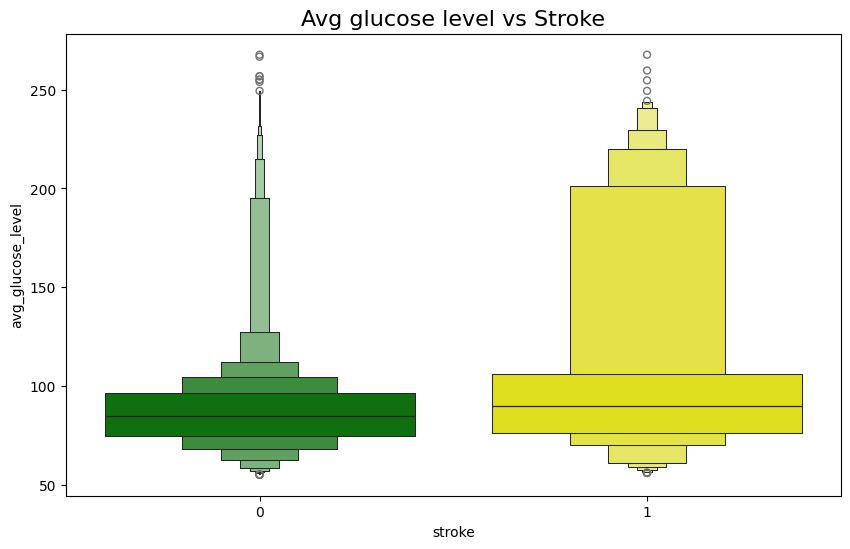

In [55]:
# How avg_glucose_level feature effects the target variable
plt.figure(figsize=(10, 6))

sns.set_palette('Set2')

ax = sns.boxenplot(data=df_train, x='stroke', y='avg_glucose_level', palette = ['green', 'yellow'])
ax.set_title('Avg glucose level vs Stroke', fontdict={'fontsize': 16})
plt.show()

Một lần nữa, lượng glucose trung bình càng cao thì nguy cơ bị đột quỵ càng cao.

**3- BMI**

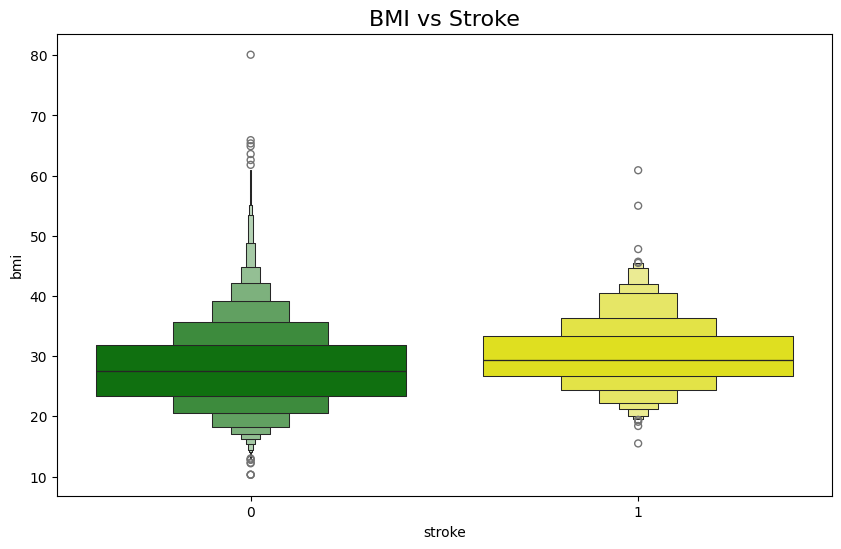

In [56]:
# How bmi feature effects the target variable
plt.figure(figsize=(10, 6))

sns.set_palette('Set2')

ax = sns.boxenplot(data=df_train, x='stroke', y='bmi', palette = ['green', 'yellow'])
ax.set_title('BMI vs Stroke', fontdict={'fontsize': 16})
plt.show()

Có thể thấy rằng chỉ số BMI của các bệnh nhân bị đột quỵ và không bị đột quỵ có phân bố tương đối tương đồng, tập trung ở khoảng 25 đến 35. Tuy nhiên, nhóm không bị đột quỵ có phân bố rộng hơn với nhiều giá trị ngoại lệ. Điều này gợi ý rằng BMI có thể không phải là yếu tố duy nhất hoặc quan trọng nhất liên quan đến nguy cơ đột quỵ, và cần thêm phân tích để xác định các yếu tố khác có liên quan.

---

# **5. Data Preprocessing(Tiền xử lí dữ liệu)**

In [57]:
# Kiểm tra các giá trị bị thiếu trong tập dữ liệu
df_train.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Không có giá trị bị thiếu trong tập dữ liệu

In [58]:
print("Số giá trị trùng lặp: ", df_train.duplicated().sum())

Số giá trị trùng lặp:  0


Không có giá trị bị trùng lặp trong tập dữ liệu

Trong phần này, chúng ta sẽ tiền xử lý tập dữ liệu để sẵn sàng cho việc huấn luyện mô hình. Trước tiên, sẽ kết hợp tập huấn luyện df_train với **tập dữ liệu gốc original dataset** và tập kiểm tra df_test, sau đó thực hiện như sau:
- 1. Loại bỏ 2 thuộc tính *Residence_type* và *bmi* vì chúng hầu như không có tác động đến biến mục tiêu và việc loại bỏ những thuộc tính như thế sẽ giúp cho việc huấn luyện mô hình đạt được hiệu quả cao.
- 2. Mã hóa tất cả các biến phân loại(categorical variables) thành kiểu số để phù hợp với các thuật toán mà chúng tôi sẽ sử dụng trong phần sau.
- 3. Chuẩn hóa/Scaling một số thuộc tính có giá trị không cùng tỷ lệ với các thuộc tính khác. Ở đây chúng ta sẽ sử dụng thuật toán MinMaxScaler scaling các giá trị trong khoảng từ 0 đến 1

---

In [59]:
# load the original dataset
df_orig = pd.read_csv('/content/drive/MyDrive/Data Mining/FinalProject/dataset/healthcare-dataset-stroke-data.csv', index_col=0)

Vì trong tập dữ liệu, có nhiều quan sát có giá trị đột quỵ là 0, nhưng chỉ có một vài quan sát có giá trị đột quỵ là 1, chúng ta sẽ chỉ kết hợp những hàng từ dữ liệu gốc mà có giá trị đột quỵ là 1.

In [60]:
# Select rows with stroke value of 1
df_orig_stroke_1 = df_orig[df_orig['stroke'] == 1]

# Combine it with the training set using pd.concat
df_train = pd.concat([df_train, df_orig_stroke_1], ignore_index=True)

# Check the shape of the combined DataFrame
print(df_train.shape)
df_train

(15553, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
15548,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
15549,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
15550,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
15551,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


In [61]:
# Kết hợp các DataFrame df_train và df_test để đảm bảo tính nhất quán

df = pd.concat([df_train, df_test], ignore_index=True)

# Đặt lại chỉ số vì tập dữ liệu gốc cũng bắt đầu từ 0
df.reset_index(drop=True, inplace=True)

# Kiểm tra hình dạng của DataFrame kết hợp
print(df.shape)

(25757, 11)


In [62]:
# 1- Xóa 2 thuộc tính Residence_type và bmi trong bộ dữ liệu
df.drop(['Residence_type', 'bmi'], axis=1, inplace=True)

In [63]:
# 2- Mã hóa các categorical variable

# gender
df['gender'] = df['gender'].map({
    'Male': 0,
    'Female': 1,
    'Other': 2
}).astype('int')

# ever_married
df['ever_married'] = df['ever_married'].map({
    'Yes': 1,
    'No': 0
}).astype('int')

# work_type
df['work_type'] = df['work_type'].map({
    'Private':0,
    'Self-employed': 1,
    'Govt_job': 2,
    'children': 3,
    'Never_worked': 4
}).astype('int')

# smoking_status
df['smoking_status'] = df['smoking_status'].map({
    'never smoked' : 0,
    'formerly smoked': 1,
    'smokes': 2,
    'Unknown': 3
}).astype('int')

df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
avg_glucose_level    float64
smoking_status         int64
stroke               float64
dtype: object

In [64]:
# 3- Chuẩn hóa các numeric variables (age và avg_glucose_level) sử dụng MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['age', 'avg_glucose_level']] = scaler.fit_transform(df[['age', 'avg_glucose_level']])
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke
0,0,0.340820,0,0,1,0,0.112686,0,0.0
1,0,0.401855,0,0,1,0,0.107654,1,0.0
2,1,0.511719,0,0,1,0,0.221032,3,0.0
3,0,0.682617,0,0,1,0,0.045010,0,0.0
4,1,0.291992,0,0,0,0,0.084203,0,0.0


In [65]:
# Chia tập dữ liệu thành 2 tập train và test
df_train = df.loc[:df_train.shape[0]-1]
df_test = df.loc[df_train.shape[0]:].iloc[:, :-1]

In [66]:
df_train

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke
0,0,0.340820,0,0,1,0,0.112686,0,0.0
1,0,0.401855,0,0,1,0,0.107654,1,0.0
2,1,0.511719,0,0,1,0,0.221032,3,0.0
3,0,0.682617,0,0,1,0,0.045010,0,0.0
4,1,0.291992,0,0,0,0,0.084203,0,0.0
...,...,...,...,...,...,...,...,...,...
15548,0,0.694824,0,0,1,0,0.137753,3,1.0
15549,1,0.169922,0,0,0,3,0.012972,3,1.0
15550,1,0.914551,0,0,1,1,0.109316,1,1.0
15551,0,0.865723,1,0,1,1,0.150863,3,1.0


---

In [67]:
df_test

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status
15553,1,0.694824,0,0,1,0,0.126581,3
15554,0,0.853516,1,0,1,0,0.078201,3
15555,1,0.060059,0,0,0,3,0.224356,3
15556,1,0.682617,0,0,1,2,0.065183,2
15557,0,0.389648,0,0,1,0,0.258656,2
...,...,...,...,...,...,...,...,...
25752,1,0.328613,0,0,0,0,0.095328,0
25753,0,0.597168,0,0,1,0,0.220617,3
25754,1,0.035645,0,0,0,3,0.225833,3
25755,0,0.377441,0,0,1,0,0.125981,0


# **6. Modeling**

In [68]:
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [69]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9395692703310833
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      2921
         1.0       0.53      0.09      0.15       190

    accuracy                           0.94      3111
   macro avg       0.74      0.54      0.56      3111
weighted avg       0.92      0.94      0.92      3111



# k-Nearest Neighbors

In [70]:
# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

k-NN Accuracy: 0.9350691096110575
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      2921
         1.0       0.38      0.11      0.17       190

    accuracy                           0.94      3111
   macro avg       0.66      0.55      0.57      3111
weighted avg       0.91      0.94      0.92      3111



# Support Vector Machine (SVM)

In [71]:
# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

SVM Accuracy: 0.9389263902282224
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      2921
         1.0       0.00      0.00      0.00       190

    accuracy                           0.94      3111
   macro avg       0.47      0.50      0.48      3111
weighted avg       0.88      0.94      0.91      3111



# Decision Trees

In [72]:
# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.9067823850851816
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      2921
         1.0       0.26      0.28      0.27       190

    accuracy                           0.91      3111
   macro avg       0.61      0.61      0.61      3111
weighted avg       0.91      0.91      0.91      3111



# Random Forest

In [73]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9302475088396014
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      2921
         1.0       0.33      0.14      0.19       190

    accuracy                           0.93      3111
   macro avg       0.64      0.56      0.58      3111
weighted avg       0.91      0.93      0.92      3111



# XGBoost

In [74]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9347476695596272
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2921
         1.0       0.41      0.15      0.22       190

    accuracy                           0.93      3111
   macro avg       0.68      0.57      0.59      3111
weighted avg       0.91      0.93      0.92      3111



# Neural Networks

In [75]:
# Neural Networks
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("Neural Networks Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

Neural Networks Accuracy: 0.938604950176792
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      2921
         1.0       0.48      0.07      0.12       190

    accuracy                           0.94      3111
   macro avg       0.71      0.53      0.54      3111
weighted avg       0.91      0.94      0.92      3111



# Naive Bayes

In [76]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8993892639022822
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      2921
         1.0       0.28      0.40      0.33       190

    accuracy                           0.90      3111
   macro avg       0.62      0.67      0.64      3111
weighted avg       0.92      0.90      0.91      3111



# Chọn model có hiệu suất tốt nhất

In [77]:
# Huấn luyện và đánh giá các mô hình
models = {
    'Logistic Regression': LogisticRegression(),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Neural Networks': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300),
    'Naive Bayes': GaussianNB()
}

best_model = None
best_accuracy = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"\nBest model: {best_model.__class__.__name__} with accuracy: {best_accuracy}")

Logistic Regression Accuracy: 0.9395692703310833
k-NN Accuracy: 0.9350691096110575
SVM Accuracy: 0.9389263902282224
Decision Tree Accuracy: 0.9080681452909033
Random Forest Accuracy: 0.9292831886853102
XGBoost Accuracy: 0.9347476695596272
Neural Networks Accuracy: 0.9392478302796529
Naive Bayes Accuracy: 0.8993892639022822

Best model: LogisticRegression with accuracy: 0.9395692703310833


# Dự đoán trên tập dữ liệu test và ghi ra file kết quả dự đoán

In [78]:
# predict the stroke values in the test set
preds = best_model.predict_proba(df_test)[:, 1]

In [79]:
# scale the values between 0 and 1 (probability), since some datapoints may be < 0. or > 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
preds = scaler.fit_transform(preds.reshape(-1, 1))

In [82]:
submission = pd.DataFrame({
    'id': np.arange(15304, 25508),
    'stroke': preds.reshape(-1, )
})
submission.head(10)

,id,stroke
0,15304,0.070772
1,15305,0.301295
2,15306,0.000844
3,15307,0.041666
4,15308,0.013048
5,15309,0.017934
6,15310,0.020196
7,15311,0.053370
8,15312,0.001315
9,15313,0.036862


In [81]:
# Viết kết quả vào file csv
submission.to_csv('/content/drive/MyDrive/Data Mining/FinalProject/submission.csv', index=False)